In [23]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer, Aer, execute, assemble
import math
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_histogram

In [14]:
qc = QuantumCircuit(1, 1)
qc.h(0)

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
output_state = result.get_statevector(qc)
plot_bloch_multivector(output_state)
# figure.savefig('sphere.png')

AttributeError: 'Arrow3D' object has no attribute 'do_3d_projection'

<Figure size 288x288 with 1 Axes>

AttributeError: 'Arrow3D' object has no attribute 'do_3d_projection'

<Figure size 288x288 with 1 Axes>

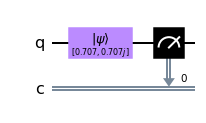

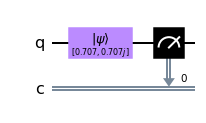

In [18]:

qc = QuantumCircuit(1, 1)
state_vector = [1/math.sqrt(2), 1j/math.sqrt(2)] # [0.70710678118, 0.70710678118]
qc.initialize(state_vector, 0)
qc.measure(0, 0)
qc.draw('mpl')



{'0': 523, '1': 501}


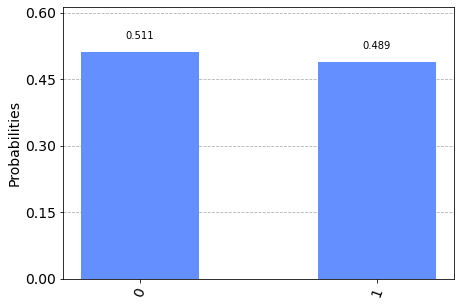

In [19]:
job = execute(qc,BasicAer.get_backend('qasm_simulator'))
figure = plot_histogram(job.result().get_counts())
print(job.result().get_counts())
figure.savefig('histogram1.png')

[0.5773502691896257, 0.816496580927726]
{'1': 704, '0': 320}


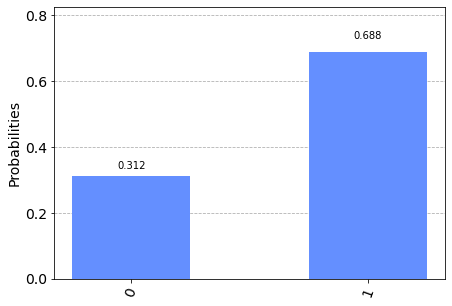

In [21]:
qc = QuantumCircuit(1, 1)
prob = 1/3
value = 1 - prob
state_vector = [math.sqrt(1-value), math.sqrt(value)]
print(state_vector)
qc.initialize(state_vector, 0)
qc.measure(0, 0)

shots = 1024
job = execute(qc, BasicAer.get_backend('qasm_simulator'), shots=shots)
print(job.result().get_counts())
figure = plot_histogram(job.result().get_counts())
figure.savefig('histogram3.png')

In [26]:
from math import sqrt

qc = QuantumCircuit(1)
state_vector = [0.+1.j/sqrt(2), 1/sqrt(2)+0.j]
qc.initialize(state_vector, 0)
#qc.measure_all()

sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print(str(state))

[0.        +0.70710678j 0.70710678+0.j        ]


In [28]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print(str(state))


[1.+0.j 0.+0.j]
